# Exploratory Data Analysis 

## Steps in EDA#
### 1) Data understanding
### 2) Data cleaning
### 3) Analysis of Relationship between variables

### DATA UNDERSTANDING

In [40]:
#IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [41]:
#READING DATASETS
url ='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, error_bad_lines=False)

In [42]:
#PANDAS PROFILING
pp.ProfileReport(fuel_data)

In [43]:
fuel_data.head()

record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   
3   f1_fuel_1994_12_2_0_7                 2         1994   
4  f1_fuel_1994_12_2_0_10                 2         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton        5377489.0   
1  rockport total plant                coal       ton       10486945.0   
2                gorgas                coal       ton        2978683.0   
3                 barry                coal       ton        3739484.0   
4             chickasaw                 gas       mcf          40533.0   

   fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0               16.590                      18.59   
1               16.592                      18.58   
2               24.130                      39.72   
3               23.950                      47.21   
4                1.000                       2.77   

   fuel_cost_per_unit_delivered  fuel_cost_per_mmbtu  
0                         18.53                1.121  
1                         18.53                1.120  
2                         38.12                1.650  
3                         45.99                1.970  
4                          2.77                2.570

In [44]:
fuel_data.tail()

record_id  utility_id_ferc1  report_year  \
29518  f1_fuel_2018_12_12_0_13                12         2018   
29519   f1_fuel_2018_12_12_1_1                12         2018   
29520  f1_fuel_2018_12_12_1_10                12         2018   
29521  f1_fuel_2018_12_12_1_13                12         2018   
29522  f1_fuel_2018_12_12_1_14                12         2018   

           plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
29518    neil simpson ct #1                 gas       mcf          18799.0   
29519  cheyenne prairie 58%                 gas       mcf         806730.0   
29520     lange ct facility                 gas       mcf         104554.0   
29521       wygen 3 bhp 52%                coal       ton         315945.0   
29522       wygen 3 bhp 52%                 gas       mcf          17853.0   

       fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
29518                1.059                       4.78   
29519                1.050                       3.65   
29520                1.060                       4.77   
29521               16.108                       3.06   
29522                1.059                       0.00   

       fuel_cost_per_unit_delivered  fuel_cost_per_mmbtu  
29518                          4.78                 9.03  
29519                          3.65                 6.95  
29520                          4.77                 8.99  
29521                         14.76                 1.11  
29522                          0.00                11.68

In [45]:
fuel_data.shape

(29523, 11)

In [46]:
fuel_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [47]:
#check for missing value
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [48]:
#count the numbers of unique values of the fuel_unit column
fuel_data['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [49]:
#we see that 'mcf' has higher count of values, so we can fill up the missing values with this and it will have little or no effect on our data distribution
fuel_data['fuel_unit'] = fuel_data['fuel_unit'].fillna('mcf') #this fills up the rows with missing values

In [50]:
#check dataset again for missing values
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [51]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29523 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [52]:
fuel_data['fuel_qty_burned'].astype('int64')
fuel_data.describe()


utility_id_ferc1   report_year  fuel_qty_burned  fuel_mmbtu_per_unit  \
count      29523.000000  29523.000000     2.952300e+04         29523.000000   
mean         118.601836   2005.806050     2.622119e+06             8.492111   
std           74.178353      7.025483     9.118004e+06            10.600220   
min            1.000000   1994.000000     1.000000e+00             0.000001   
25%           55.000000   2000.000000     1.381700e+04             1.024000   
50%          122.000000   2006.000000     2.533220e+05             5.762694   
75%          176.000000   2012.000000     1.424034e+06            17.006000   
max          514.000000   2018.000000     5.558942e+08           341.260000   

       fuel_cost_per_unit_burned  fuel_cost_per_unit_delivered  \
count               29523.000000                  2.952300e+04   
mean                  208.649031                  9.175704e+02   
std                  2854.490090                  6.877593e+04   
min                  -276.080000                 -8.749370e+02   
25%                     5.207000                  3.778500e+00   
50%                    26.000000                  1.737100e+01   
75%                    47.113000                  4.213700e+01   
max                139358.000000                  7.964521e+06   

       fuel_cost_per_mmbtu  
count         29523.000000  
mean             19.304354  
std            2091.540939  
min             -41.501000  
25%               1.940000  
50%               4.127000  
75%               7.745000  
max          359278.000000

In [53]:
fuel_data.round(5)

record_id  utility_id_ferc1  report_year  \
0        f1_fuel_1994_12_1_0_7                 1         1994   
1       f1_fuel_1994_12_1_0_10                 1         1994   
2        f1_fuel_1994_12_2_0_1                 2         1994   
3        f1_fuel_1994_12_2_0_7                 2         1994   
4       f1_fuel_1994_12_2_0_10                 2         1994   
...                        ...               ...          ...   
29518  f1_fuel_2018_12_12_0_13                12         2018   
29519   f1_fuel_2018_12_12_1_1                12         2018   
29520  f1_fuel_2018_12_12_1_10                12         2018   
29521  f1_fuel_2018_12_12_1_13                12         2018   
29522  f1_fuel_2018_12_12_1_14                12         2018   

           plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0                  rockport                coal       ton        5377489.0   
1      rockport total plant                coal       ton       10486945.0   
2                    gorgas                coal       ton        2978683.0   
3                     barry                coal       ton        3739484.0   
4                 chickasaw                 gas       mcf          40533.0   
...                     ...                 ...       ...              ...   
29518    neil simpson ct #1                 gas       mcf          18799.0   
29519  cheyenne prairie 58%                 gas       mcf         806730.0   
29520     lange ct facility                 gas       mcf         104554.0   
29521       wygen 3 bhp 52%                coal       ton         315945.0   
29522       wygen 3 bhp 52%                 gas       mcf          17853.0   

       fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0                   16.590                      18.59   
1                   16.592                      18.58   
2                   24.130                      39.72   
3                   23.950                      47.21   
4                    1.000                       2.77   
...                    ...                        ...   
29518                1.059                       4.78   
29519                1.050                       3.65   
29520                1.060                       4.77   
29521               16.108                       3.06   
29522                1.059                       0.00   

       fuel_cost_per_unit_delivered  fuel_cost_per_mmbtu  
0                             18.53                1.121  
1                             18.53                1.120  
2                             38.12                1.650  
3                             45.99                1.970  
4                              2.77                2.570  
...                             ...                  ...  
29518                          4.78                9.030  
29519                          3.65                6.950  
29520                          4.77                8.990  
29521                         14.76                1.110  
29522                          0.00               11.680  

[29523 rows x 11 columns]

## Relationship between variables and Plotting of these relationships

In [60]:
#use groupby to show the total quantity of fuel burned in each report year
usage_year = fuel_data[['report_year','fuel_qty_burned']].groupby('report_year').sum().astype('int64')
usage_year

fuel_qty_burned
report_year                 
1994              3364162841
1995              4458192116
1996              2768692878
1997              3077972763
1998              3617070075
1999              3445344906
2000              3394100198
2001              3147821459
2002              2585502144
2003              2287120859
2004              2124796599
2005              2244703463
2006              2432878751
2007              2573119217
2008              2513046864
2009              2633401233
2010              3056311520
2011              3052051818
2012              3414637324
2013              3287064860
2014              3161709843
2015              3650763433
2016              3818861165
2017              3329380211
2018              3974123939

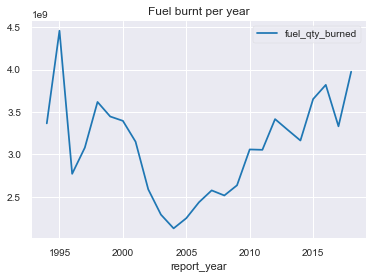

In [61]:
#we could also do a simple plot to veiw the amount of fuel burnt per year
usage_year.plot()
sns.set_style('darkgrid')
plt.title('Fuel burnt per year')
plt.show()

In [56]:
#use groupby to show the total quantity of fuel burned for each fuel type
fuel_type= fuel_data[['fuel_type_code_pudl','fuel_qty_burned']].groupby('fuel_type_code_pudl').sum().astype('int64')
fuel_type

fuel_qty_burned
fuel_type_code_pudl                 
coal                     16268982074
gas                      55628796696
nuclear                   4462057832
oil                        508973672
other                      492338814
waste                       51681391

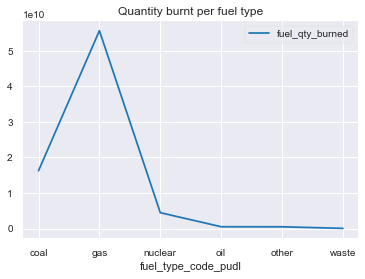

In [57]:
#we could also do a simple plot to veiw the amount of fuel burnt per year
fuel_type.plot()
sns.set_style('darkgrid')
plt.title('Quantity burnt per fuel type')
plt.show()

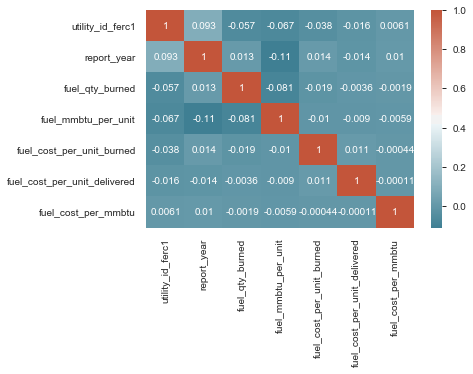

In [58]:
# calculate correlation matrix
corr = fuel_data.corr()
#plot heat map
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Text(0.5, 1, 'correlation matrix')

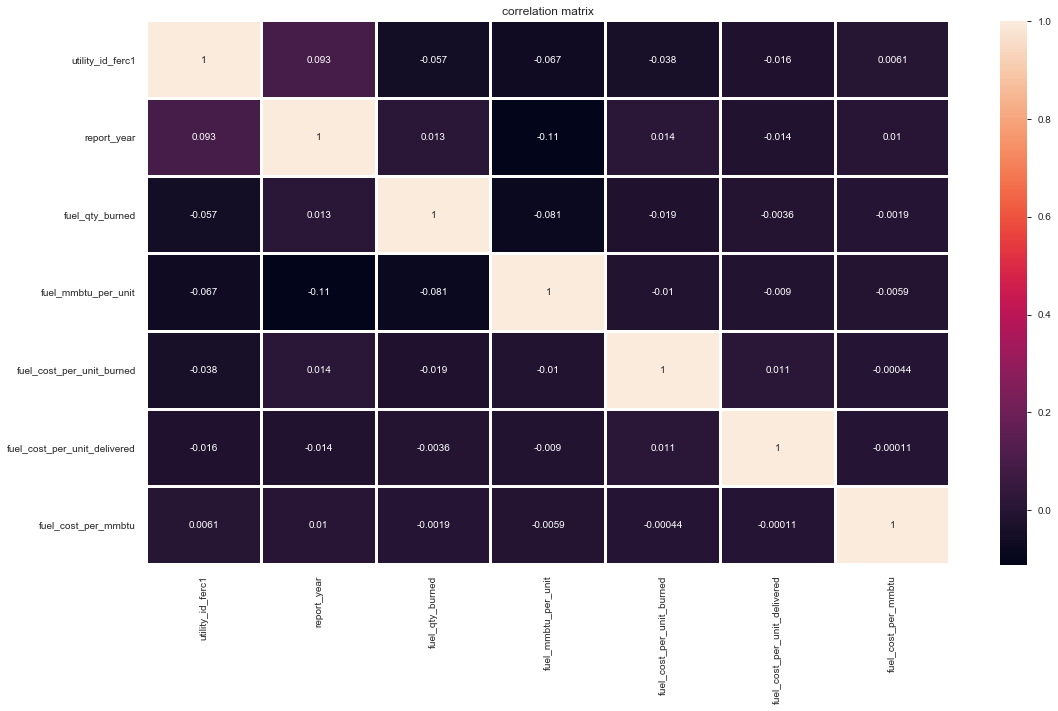

In [62]:
corr_matrix= fuel_data.corr()
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(corr_matrix,linewidths=2.0,ax=ax,annot=True)
ax.set_title('correlation matrix')

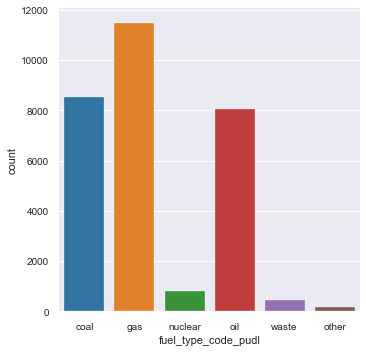

In [63]:
sns.catplot(x="fuel_type_code_pudl", kind="count", data=fuel_data,orient='h')

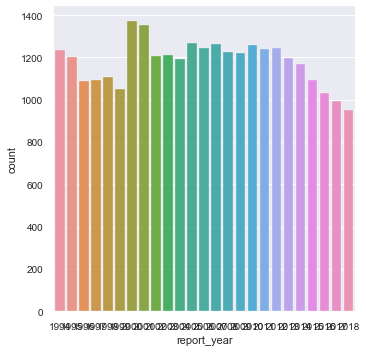

In [66]:
sns.catplot(x="report_year", kind="count", data=fuel_data,orient='b')

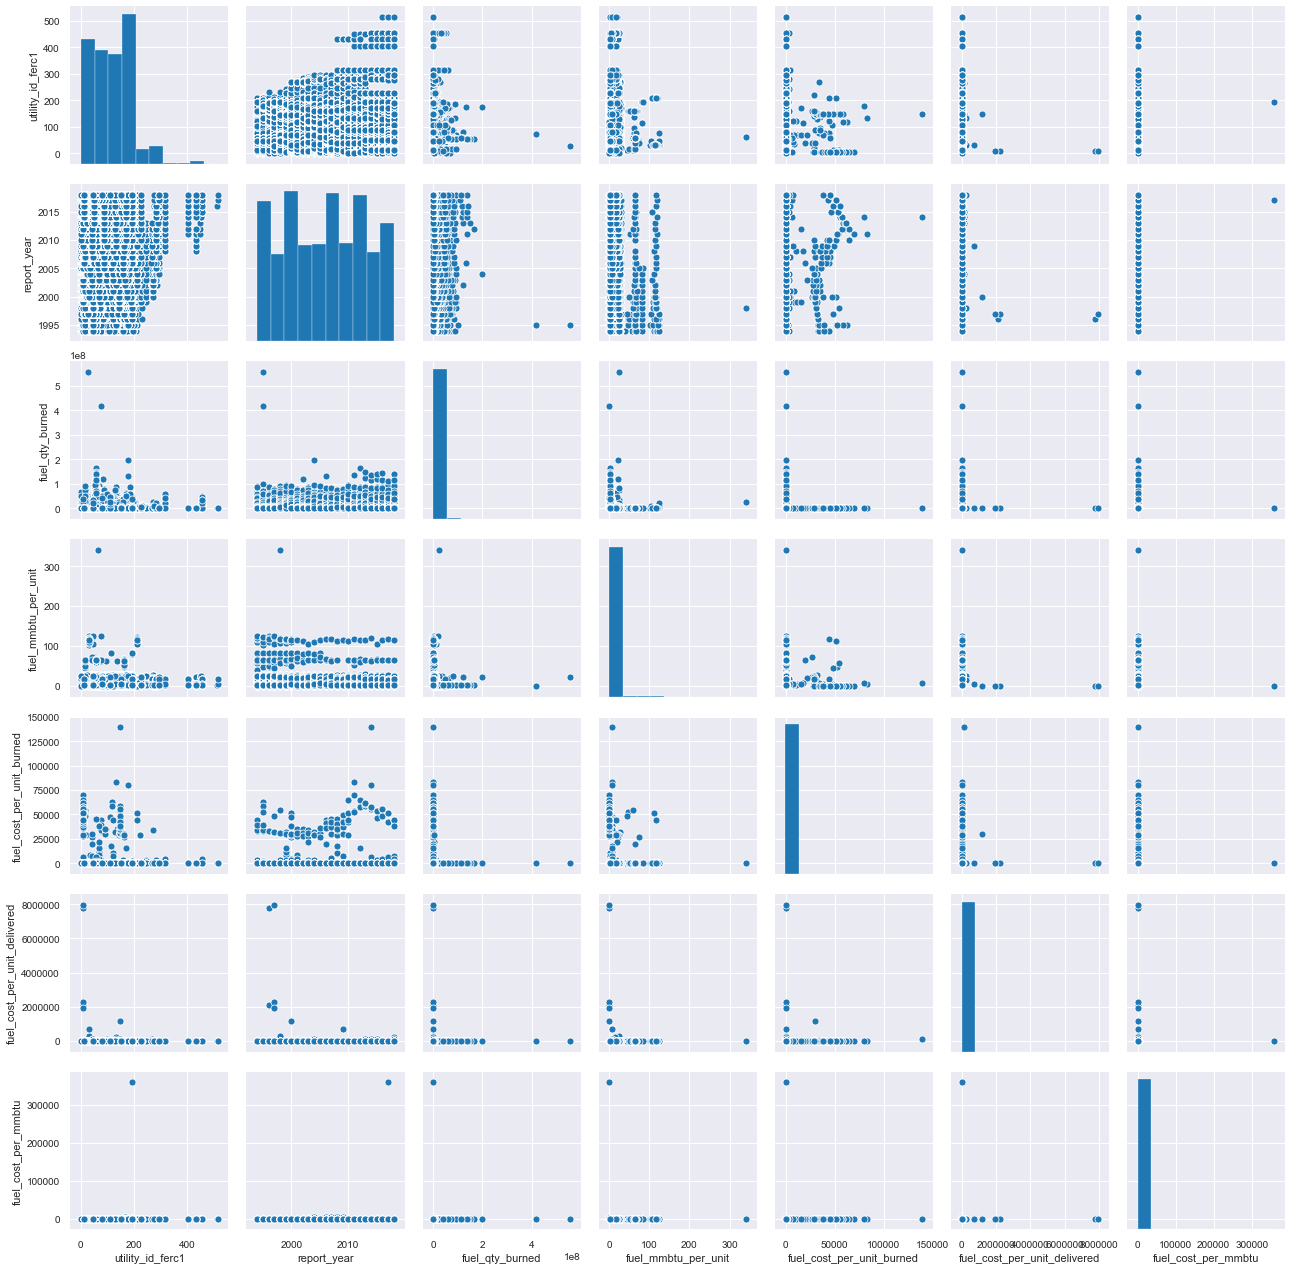

In [67]:
sns.pairplot(fuel_data)
